## Setup and imports

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import itertools
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style('whitegrid')
sns.set_palette('colorblind')
 
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

MARKERS = 'o v ^ < > s p P * x X D d'.split()

In [2]:
pd.set_option('display.max_rows', None)

# Please change your output folder and work directory here

In [3]:
OUTDIR = "/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/Final_figures/Github/"
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    
WORKDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference'
os.chdir(WORKDIR)

# Configurations

## Correct the name of algorithms

In [6]:
# This is previous order 
ALGORITHMS = 'pearson inferelator kNN-DREMI LEAP PIDC Scribe SILGGM MERLIN SCENIC SCODE Random'.split()
ALGORITHMS = sorted(ALGORITHMS, key=lambda s: s.lower())

In [7]:
# METRICS names is the original column names in the score matrix
METRICS = [
    'fscore',
    'AUPR',
    'n_TFs',
    'precision'
]

In [8]:
ALG_FIX = {
    'inferelator': 'Inferelator',
    'knnDREMI': 'kNN-DREMI',
    'pearson': 'Pearson',
    'random': 'Random'
}

ALGORITHMS = [ALG_FIX.get(a, a) for a in ALGORITHMS]

In [9]:
ALGORITHMS

['Inferelator',
 'kNN-DREMI',
 'LEAP',
 'MERLIN',
 'Pearson',
 'PIDC',
 'Random',
 'SCENIC',
 'SCODE',
 'Scribe',
 'SILGGM']

In [10]:
metrics = [
    'fscore',
    'AUPR',
    'n_TFs'
]

In [11]:
PRIMARY_GS = ['Perturb', 'ChIP', 'Perturb+ChIP']


In [12]:
TOP_N = 5000

idx_cols = 'dataset algorithm proc GS_src'.split()

# Load metrics
fscores = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/fscores/agg_fscores.normalized.txt').set_index(idx_cols)
aupr = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/AUPR/agg_AUPR.normalized.txt').set_index(idx_cols)
predTFs = pd.read_table('/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/results/predictable_TFs/agg_predictable_TFs.normalized.txt').set_index(idx_cols)

# Choose top N edges (except AUPR, which is based on all edges)
fscores = fscores.loc[fscores.n_edges == TOP_N].drop('n_edges', axis=1)
predTFs = predTFs.loc[predTFs.n_edges == TOP_N].drop('n_edges', axis=1)
aupr = aupr.loc[aupr.n_edges == 'all_edges'].drop('n_edges', axis=1)

# Concatenate metrics and toss what we don't care about
scores = pd.concat([fscores, aupr, predTFs], axis=1).reset_index()
scores = scores.loc[~scores.GS_src.str.endswith('KDUnion_c2')].copy()

scores.algorithm = scores.algorithm.replace(ALG_FIX)
scores = scores.loc[scores.algorithm.isin(ALGORITHMS)]

# # The loaded results are all normalized so we don't need proc column, pred_TFs
# # listed all predicted TFs, we don't need this column
scores = scores.drop(['proc', 'pred_TFs'], axis=1)

In [13]:
# While this scores matrix is still incorrect, because the GS_src names are not wanted
scores

,dataset,algorithm,GS_src,precision,recall,fscore,AUPR,n_TFs
0,gasch_GSE102475,Inferelator,hu,0.0182,0.0143,0.0160,0.026059,0
1,gasch_GSE102475,Inferelator,mac2,0.0212,0.0485,0.0295,0.024761,0
2,gasch_GSE102475,Inferelator,yeastract_c3,0.0288,0.0617,0.0393,0.028132,1
3,gasch_GSE102475,Inferelator,yeastract_t2,0.0312,0.0608,0.0412,0.028077,1
4,gasch_GSE102475,Inferelator,yeast_chipunion,0.0342,0.0139,0.0197,0.040722,0
5,gasch_GSE102475,Inferelator,yeast_KDUnion,0.0376,0.0115,0.0176,0.032516,2
6,gasch_GSE102475,Inferelator,yeast_chipunion_KDUnion_intersect,0.0278,0.0774,0.0409,0.027157,0
7,han_GSE107552,Inferelator,hESC_encodechip,0.4510,0.0177,0.0340,0.427559,4
8,han_GSE107552,Inferelator,hESC_escapechip,0.2044,0.0251,0.0446,0.164696,1
9,han_GSE107552,Inferelator,hESC_chipunion,0.4010,0.0125,0.0243,0.331420,6


In [14]:
scores['GS_src'].value_counts()

mESC_lit                             31
mESC_logof                           31
mESC_encodechip                      31
mESC_escapechip                      31
mESC_nishiyama                       31
mESC_KDUnion                         31
mESC_chipunion_KDUnion_intersect     31
mESC_ATAC_Day4Day6Union              31
mESC_chipunion                       31
yeast_chipunion_KDUnion_intersect    21
yeast_KDUnion                        21
mac2                                 21
yeast_chipunion                      21
yeastract_t2                         21
yeastract_c3                         21
hu                                   21
mDC_chipunion                        11
mDC_KDUnion                          11
hESC_chipunion_KDUnion_intersect     11
hESC_lit                             11
hESC_KDUnion                         11
hESC_nishiyama                       11
hESC_logof                           11
hESC_chipunion                       11
hESC_escapechip                      11


In [15]:
scores["dataset"].value_counts()

sridharan_A2S        99
sridharan_FBS        99
han_GSE107552        88
zhao_GSE114952       81
gasch_GSE102475      77
jackson_GSE125162    70
shalek_GSE48968      33
Name: dataset, dtype: int64

# Rename gold standard and metrics

In [16]:
# Rename gold standards
cell_types = 'yeast mESC mDC hESC'.split()
def clean_GS_src(GS_src):
    data = GS_src.split("_")
    if data[0] in cell_types:
        return '_'.join(data[1:])
    else:
        return '_'.join(data)
    
# Strip cell type labels from gold standard names
scores.GS_src = scores.GS_src.apply(clean_GS_src)

# and renanme the three primary gold standards
scores.GS_src = scores.GS_src.replace({'KDUnion': 'Perturb', 
                                       'chipunion': 'ChIP',
                                       'chipunion_KDUnion_intersect': 'Perturb+ChIP'})

In [17]:
scores

,dataset,algorithm,GS_src,precision,recall,fscore,AUPR,n_TFs
0,gasch_GSE102475,Inferelator,hu,0.0182,0.0143,0.0160,0.026059,0
1,gasch_GSE102475,Inferelator,mac2,0.0212,0.0485,0.0295,0.024761,0
2,gasch_GSE102475,Inferelator,yeastract_c3,0.0288,0.0617,0.0393,0.028132,1
3,gasch_GSE102475,Inferelator,yeastract_t2,0.0312,0.0608,0.0412,0.028077,1
4,gasch_GSE102475,Inferelator,ChIP,0.0342,0.0139,0.0197,0.040722,0
5,gasch_GSE102475,Inferelator,Perturb,0.0376,0.0115,0.0176,0.032516,2
6,gasch_GSE102475,Inferelator,Perturb+ChIP,0.0278,0.0774,0.0409,0.027157,0
7,han_GSE107552,Inferelator,encodechip,0.4510,0.0177,0.0340,0.427559,4
8,han_GSE107552,Inferelator,escapechip,0.2044,0.0251,0.0446,0.164696,1
9,han_GSE107552,Inferelator,ChIP,0.4010,0.0125,0.0243,0.331420,6


# Melt the dataframe

In [18]:
# melt is making the dataframe longer
scores = pd.melt(scores, 
                 id_vars=['dataset', 'algorithm', 'GS_src'], # The columns conserved
                 value_vars=METRICS, # The columns to melt
                 var_name='metric', # The summary column name of the category
                 value_name='score') # The column name of the score column

In [19]:
scores

,dataset,algorithm,GS_src,metric,score
0,gasch_GSE102475,Inferelator,hu,fscore,0.016000
1,gasch_GSE102475,Inferelator,mac2,fscore,0.029500
2,gasch_GSE102475,Inferelator,yeastract_c3,fscore,0.039300
3,gasch_GSE102475,Inferelator,yeastract_t2,fscore,0.041200
4,gasch_GSE102475,Inferelator,ChIP,fscore,0.019700
5,gasch_GSE102475,Inferelator,Perturb,fscore,0.017600
6,gasch_GSE102475,Inferelator,Perturb+ChIP,fscore,0.040900
7,han_GSE107552,Inferelator,encodechip,fscore,0.034000
8,han_GSE107552,Inferelator,escapechip,fscore,0.044600
9,han_GSE107552,Inferelator,ChIP,fscore,0.024300


## Caculate the ranks

In [20]:
algorithm_orders = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI']
algorithm_with_random = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI','Random']


In [21]:
scores['rank'] = scores.groupby(['dataset', 'GS_src', 'metric'])['score']\
                       .rank(ascending=False, method='average')

# Take median over our primary 21 comparisons, and exclude random
summary = scores.loc[scores.GS_src.isin(PRIMARY_GS) &
                     (scores.algorithm != 'Random')]\
                .groupby(['algorithm', 'metric'])['rank'].median().reset_index()

# Re-organize for heatmap
summary = summary.pivot_table(columns='algorithm', index='metric', values='rank')
summary = summary.reindex(METRICS, algorithm_orders)

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # This is added back by InteractiveShellApp.init_path()


In [22]:
summary

algorithm,Pearson,SCENIC,MERLIN,PIDC,LEAP,SCODE,Scribe,SILGGM,Inferelator,kNN-DREMI
metric,,,,,,,,,,
fscore,3.0,4.0,3.0,3.0,5.5,6.0,6.0,9.0,7.0,9.0
AUPR,2.0,3.0,4.0,4.5,6.0,5.0,5.0,9.0,7.0,9.0
n_TFs,2.5,2.5,3.5,3.5,5.0,7.0,6.5,9.0,6.0,9.0
precision,3.0,4.0,5.0,3.0,5.0,6.0,6.0,9.0,6.5,9.0


# Primary Scores
These are socres for the 3 kinds of gold standard we used

In [23]:
primary_scores = scores.loc[scores.GS_src.isin(PRIMARY_GS)].copy()

In [24]:
primary_scores

,dataset,algorithm,GS_src,metric,score,rank
4,gasch_GSE102475,Inferelator,ChIP,fscore,0.019700,9.0
5,gasch_GSE102475,Inferelator,Perturb,fscore,0.017600,9.0
6,gasch_GSE102475,Inferelator,Perturb+ChIP,fscore,0.040900,8.0
9,han_GSE107552,Inferelator,ChIP,fscore,0.024300,3.0
12,han_GSE107552,Inferelator,Perturb,fscore,0.017500,7.0
13,han_GSE107552,Inferelator,Perturb+ChIP,fscore,0.090000,6.0
17,sridharan_A2S,Inferelator,ChIP,fscore,0.051500,7.0
20,sridharan_A2S,Inferelator,Perturb,fscore,0.015300,7.0
21,sridharan_A2S,Inferelator,Perturb+ChIP,fscore,0.074400,8.0
26,sridharan_FBS,Inferelator,ChIP,fscore,0.045800,8.0


In [25]:
# Rename the Random to random
rand_scores = primary_scores.loc[primary_scores.algorithm == 'Random'].rename(columns={'score': 'random'})

In [26]:
rand_scores

,dataset,algorithm,GS_src,metric,random,rank
499,gasch_GSE102475,Random,ChIP,fscore,0.021900,8.0
500,gasch_GSE102475,Random,Perturb,fscore,0.013200,11.0
501,gasch_GSE102475,Random,Perturb+ChIP,fscore,0.030600,10.0
504,han_GSE107552,Random,ChIP,fscore,0.019500,9.0
507,han_GSE107552,Random,Perturb,fscore,0.010100,10.0
508,han_GSE107552,Random,Perturb+ChIP,fscore,0.046800,8.0
512,sridharan_A2S,Random,ChIP,fscore,0.039700,10.0
515,sridharan_A2S,Random,Perturb,fscore,0.011100,10.0
516,sridharan_A2S,Random,Perturb+ChIP,fscore,0.057900,11.0
521,sridharan_FBS,Random,ChIP,fscore,0.040100,10.0


In [27]:
# merge the primary scores (which contain the true algorithms' scores) and the rand_scores, to calculate the rand_ratio
# to benchmark the performance.
primary_scores = pd.merge(primary_scores, rand_scores.drop(['rank', 'algorithm'], axis=1),
                  on=['dataset', 'GS_src', 'metric'],
                  how='left')

In [28]:
primary_scores

,dataset,algorithm,GS_src,metric,score,rank,random
0,gasch_GSE102475,Inferelator,ChIP,fscore,0.019700,9.0,0.021900
1,gasch_GSE102475,Inferelator,Perturb,fscore,0.017600,9.0,0.013200
2,gasch_GSE102475,Inferelator,Perturb+ChIP,fscore,0.040900,8.0,0.030600
3,han_GSE107552,Inferelator,ChIP,fscore,0.024300,3.0,0.019500
4,han_GSE107552,Inferelator,Perturb,fscore,0.017500,7.0,0.010100
5,han_GSE107552,Inferelator,Perturb+ChIP,fscore,0.090000,6.0,0.046800
6,sridharan_A2S,Inferelator,ChIP,fscore,0.051500,7.0,0.039700
7,sridharan_A2S,Inferelator,Perturb,fscore,0.015300,7.0,0.011100
8,sridharan_A2S,Inferelator,Perturb+ChIP,fscore,0.074400,8.0,0.057900
9,sridharan_FBS,Inferelator,ChIP,fscore,0.045800,8.0,0.040100


In [29]:
# For number of predictable TFs, it's always zero for random methods, so it will be divided by zero
primary_scores['rand_ratio'] = primary_scores['score'] / primary_scores['random']
primary_scores['log_rand_ratio'] = np.log2(primary_scores['rand_ratio'])

/mnt/ws/home/jli/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
ALG_PALETTE = sns.color_palette('colorblind') + [sns.xkcd_rgb['dark grey']]

In [31]:
# Set up a previous order to get the same palette
ALGORITHMS = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI','Random']
PALETTE_MAP = {a: c for a, c in zip(ALGORITHMS, ALG_PALETTE)}

In [32]:
METRIC_TITLES = {
    'fscore': 'F-score',
    'AUPR': 'AUPR',
    'n_TFs': 'Predictable TFs',
    'precision': 'Precision'
}

In [33]:
primary_scores

,dataset,algorithm,GS_src,metric,score,rank,random,rand_ratio,log_rand_ratio
0,gasch_GSE102475,Inferelator,ChIP,fscore,0.019700,9.0,0.021900,0.899543,-0.152735
1,gasch_GSE102475,Inferelator,Perturb,fscore,0.017600,9.0,0.013200,1.333333,0.415037
2,gasch_GSE102475,Inferelator,Perturb+ChIP,fscore,0.040900,8.0,0.030600,1.336601,0.418569
3,han_GSE107552,Inferelator,ChIP,fscore,0.024300,3.0,0.019500,1.246154,0.317482
4,han_GSE107552,Inferelator,Perturb,fscore,0.017500,7.0,0.010100,1.732673,0.793000
5,han_GSE107552,Inferelator,Perturb+ChIP,fscore,0.090000,6.0,0.046800,1.923077,0.943416
6,sridharan_A2S,Inferelator,ChIP,fscore,0.051500,7.0,0.039700,1.297229,0.375433
7,sridharan_A2S,Inferelator,Perturb,fscore,0.015300,7.0,0.011100,1.378378,0.462972
8,sridharan_A2S,Inferelator,Perturb+ChIP,fscore,0.074400,8.0,0.057900,1.284974,0.361739
9,sridharan_FBS,Inferelator,ChIP,fscore,0.045800,8.0,0.040100,1.142145,0.191745


# Remove Random from the algorithm (Re define the configuration)

In [34]:
# ALGORITHMS = 'pearson inferelator kNN-DREMI LEAP PIDC Scribe SILGGM MERLIN SCENIC SCODE'.split()
# # ALGORITHMS = 'HurdleNormal inferelator kNN-DREMI LEAP PIDC Scribe SCHiRM SILGGM MERLIN SCENIC SCODE'.split()
# ALGORITHMS = sorted(ALGORITHMS, key=lambda s: s.lower())
# ALG_FIX = {
#     'inferelator': 'Inferelator',
#     'knnDREMI': 'kNN-DREMI',
#     'pearson': 'Pearson',
#     'random': 'Random'
# }

# ALGORITHMS = [ALG_FIX.get(a, a) for a in ALGORITHMS]

In [35]:
# Get the order of figure3

In [36]:
summary

algorithm,Pearson,SCENIC,MERLIN,PIDC,LEAP,SCODE,Scribe,SILGGM,Inferelator,kNN-DREMI
metric,,,,,,,,,,
fscore,3.0,4.0,3.0,3.0,5.5,6.0,6.0,9.0,7.0,9.0
AUPR,2.0,3.0,4.0,4.5,6.0,5.0,5.0,9.0,7.0,9.0
n_TFs,2.5,2.5,3.5,3.5,5.0,7.0,6.5,9.0,6.0,9.0
precision,3.0,4.0,5.0,3.0,5.0,6.0,6.0,9.0,6.5,9.0


In [37]:
summary.iloc[0:2,].T

metric,fscore,AUPR
algorithm,,
Pearson,3.0,2.0
SCENIC,4.0,3.0
MERLIN,3.0,4.0
PIDC,3.0,4.5
LEAP,5.5,6.0
SCODE,6.0,5.0
Scribe,6.0,5.0
SILGGM,9.0,9.0
Inferelator,7.0,7.0


In [38]:
fig3_order = summary.iloc[0:2,].T.median(axis=1).sort_values(ascending=True).index

In [39]:
fig3_order

Index(['Pearson', 'SCENIC', 'MERLIN', 'PIDC', 'SCODE', 'Scribe', 'LEAP',
       'Inferelator', 'SILGGM', 'kNN-DREMI'],
      dtype='object', name='algorithm')

# Fig 3D

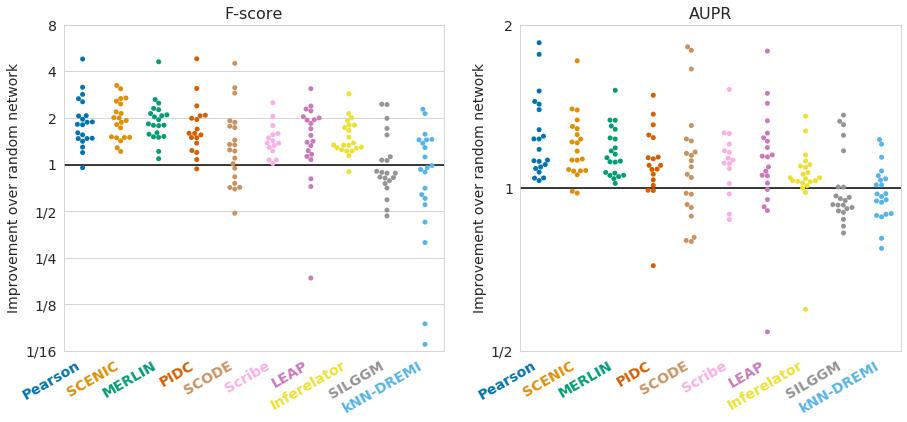

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#for metric, ax in zip(['fscore', 'AUPR', 'n_TFs'], axes):

for metric, ax in zip(['fscore', 'AUPR'], axes):
    data = primary_scores.loc[(primary_scores.algorithm != 'random') &  # Jan 07 revise, Random to random
                              (primary_scores.metric == metric)]
    #print(data.head())    
    if metric == 'n_TFs':
        yval = 'score'
    else:
        yval = 'log_rand_ratio'
    
    order = fig3_order
    
    #order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
#     idx_order = [algorithm_orders.index(a) for a in order]
#     print(idx_order)
    #idx_order = algorithm_orders
    palette = [PALETTE_MAP[i] for i in order]
        
    ax = sns.swarmplot(data=data,
                       x='algorithm', order=order,
                       y=yval,
                       palette=palette,
                       ax=ax)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    [t.set_color(i) for i, t in
     zip(palette, ax.xaxis.get_ticklabels())]

    [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
#     ax.set_ylabel('Fold change\nrelative to random')
    ax.set_ylabel(None)
    ax.axhline(0, c='k')
    ax.set_xlabel(None)

    #if metric != 'n_TFs':
    if metric == 'fscore':
#         ax.set_yticks([-2, -1, 0, 1])
        ax.set_yticks(np.arange(-4, 4, 1))
        ax.set_yticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
        ax.set_ylim(-4, 3)
        ax.set_ylabel('Improvement over random network')
    else:
        ax.set_yticks(np.arange(-1, 2, 1))
        ax.set_yticklabels(['1/2', '1', '2'])
        ax.set_ylim(-1, 1)
        ax.set_ylabel('Improvement over random network')
#     else:
#         ax.set_yticks([-1, 0, 1])
#         ax.set_yticklabels(['1/2', '1', '2'])    
    
    ax.set_title(METRIC_TITLES[metric])

    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

# plt.text(0.02, 0.5, "Fold change relative to random", 
#          fontsize=14,
#          transform=fig.transFigure,
#          rotation=90, va='center', ha='right')
# #          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.3d.pdf'), bbox_inches='tight')

In [41]:
pd.DataFrame(summary.iloc[2,:])

,n_TFs
algorithm,
Pearson,2.5
SCENIC,2.5
MERLIN,3.5
PIDC,3.5
LEAP,5.0
SCODE,7.0
Scribe,6.5
SILGGM,9.0
Inferelator,6.0


In [42]:
pd.DataFrame(summary.iloc[2,:]).median(axis=1).sort_values(ascending=True)

algorithm
Pearson        2.5
SCENIC         2.5
MERLIN         3.5
PIDC           3.5
LEAP           5.0
Inferelator    6.0
Scribe         6.5
SCODE          7.0
SILGGM         9.0
kNN-DREMI      9.0
dtype: float64

In [43]:
# Set up fig4 order
fig4_order = pd.DataFrame(summary.iloc[2,:]).median(axis=1).sort_values(ascending=True).index

In [44]:
fig4_order

Index(['Pearson', 'SCENIC', 'MERLIN', 'PIDC', 'LEAP', 'Inferelator', 'Scribe',
       'SCODE', 'SILGGM', 'kNN-DREMI'],
      dtype='object', name='algorithm')

# Fig 4C

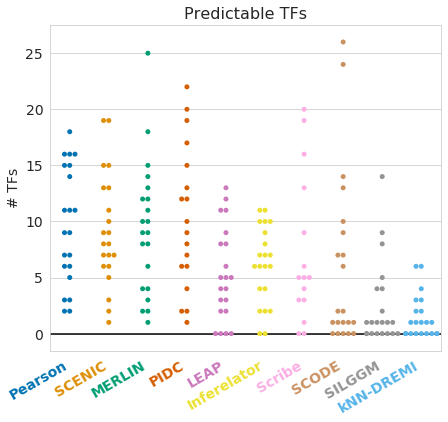

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

#for metric, ax in zip(['fscore', 'AUPR', 'n_TFs'], axes):

metric = 'n_TFs'
data = primary_scores.loc[(primary_scores.algorithm != 'random') &
                              (primary_scores.metric == metric)]
    #print(data.head())    
if metric == 'n_TFs':
    yval = 'score'
else:
    yval = 'log_rand_ratio'
    
#order = 'Pearson SCENIC MERLIN PIDC LEAP SCODE Scribe SILGGM Inferelator kNN-DREMI'.split()
    
#order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
order = fig4_order
#idx_order = [algorithm_orders.index(a) for a in order]
palette = [PALETTE_MAP[i] for i in order]
        
ax = sns.swarmplot(data=data,
                       x='algorithm', order=order,
                       y=yval,
                       palette=palette,
                       ax=ax)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
[t.set_color(i) for i, t in
zip(palette, ax.xaxis.get_ticklabels())]

[t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
#     ax.set_ylabel('Fold change\nrelative to random')
ax.set_ylabel(None)
ax.axhline(0, c='k')
ax.set_xlabel(None)

    #if metric != 'n_TFs':
if metric == 'fscore':
#         ax.set_yticks([-2, -1, 0, 1])
    ax.set_yticks(np.arange(-4, 4, 1))
    ax.set_yticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
    ax.set_ylim(-4, 3)
    ax.set_ylabel('Improvement over random network')
else:
    ax.set_ylabel('# TFs')
#     else:
#         ax.set_yticks([-1, 0, 1])
#         ax.set_yticklabels(['1/2', '1', '2'])    
    
ax.set_title(METRIC_TITLES[metric])

    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

# plt.text(0.02, 0.5, "Fold change relative to random", 
#          fontsize=14,
#          transform=fig.transFigure,
#          rotation=90, va='center', ha='right')
# #          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.4c.pdf'), bbox_inches='tight')

# Fig 3B

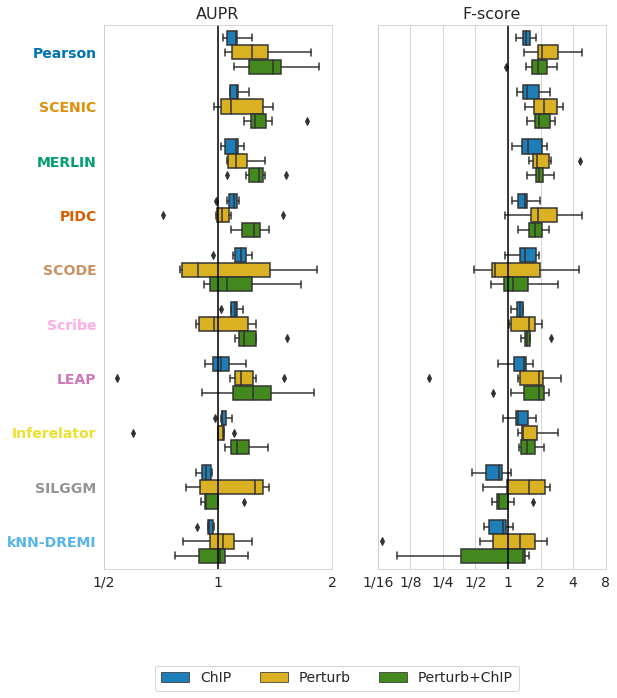

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(9, 10))

for metric, ax in zip(['AUPR', 'fscore'], axes):
    data = primary_scores.loc[(primary_scores.algorithm != 'random') &
                              (primary_scores.metric == metric)]
    
#     order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
    order = fig3_order
    
    #order = data.groupby('algorithm')[yval].mean().sort_values(ascending=False).index
#     idx_order = [algorithm_orders.index(a) for a in order]
#     print(idx_order)
    #idx_order = algorithm_orders
    palette = [PALETTE_MAP[i] for i in order]
    
    ax = sns.boxplot(data=data,
                       y='algorithm', order=order,
                       x='log_rand_ratio',
                       hue='GS_src',
                       palette=[sns.xkcd_rgb['cerulean'], sns.xkcd_rgb['goldenrod'], sns.xkcd_rgb['grass green']],
    #                  hue='GS_type', 
    #                   dodge=True, jitter=True,
                       ax=ax)
    
    if metric == 'AUPR':
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
        [t.set_color(i) for i, t in zip(palette, ax.yaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]
        
        l = ax.legend(frameon=True,      
              title=None, ncol=3,
              bbox_to_anchor=(0.485, 0.0), loc='upper center', 
              bbox_transform=fig.transFigure)
    else:
        ax.set_yticklabels([])
        ax.legend_ = None

    ax.set_xlabel(None)
    ax.axvline(0, c='k')
    ax.set_xlabel(None)

    if metric == 'fscore':
        ax.set_xlim(-4, 3)
        ax.set_xticks(np.arange(-4, 4, 1))
        ax.set_xticklabels(['1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8'])
    else:
        ax.set_xlim(-1, 1)
        ax.set_xticks(np.arange(-1, 2, 1))
        ax.set_xticklabels(['1/2', '1', '2'])

    ax.set_xlabel(None)
    ax.set_ylabel(None)
    
    ax.set_title(METRIC_TITLES[metric])
    
    #     plt.tight_layout()
#     plt.subplots_adjust(hspace=0.45)

#plt.text(0.05, 0.5, "Improvement over random network", 
#         fontsize=14,
#         transform=fig.transFigure,
#         rotation=90, va='center', ha='right')
#          rotation=90, ha='center', va='bottom')
        
plt.savefig(os.path.join(OUTDIR, 'fig.3b.pdf'), bbox_inches='tight')

# Redefine Configurations for figure 3a

In [47]:
DATASETS = [
    'gasch_GSE102475',
    'jackson_GSE125162',
    'sridharan_A2S',
    'sridharan_FBS',
    'zhao_GSE114952',
    'shalek_GSE48968',
    'han_GSE107552'
]
METRICS = ['fscore', 'AUPR', 'n_TFs']

In [48]:
ALGORITHMS = 'Inferelator kNN-DREMI LEAP MERLIN PIDC SCENIC SCODE Scribe SILGGM Pearson Random'.split()


In [49]:
ROW_INDEX = ['Perturb', 'ChIP', 'Perturb+ChIP']

In [50]:
def format_dataset(did):
    dname, geo = did.split('_')
    
    if dname == 'sridharan':
        return '{0} ({1})'.format(dname.capitalize(), geo)
    else:
        return dname.capitalize()

In [51]:
print(list(fig3_order).append('random'))

None


In [52]:
list(fig3_order)

['Pearson',
 'SCENIC',
 'MERLIN',
 'PIDC',
 'SCODE',
 'Scribe',
 'LEAP',
 'Inferelator',
 'SILGGM',
 'kNN-DREMI']

In [53]:
fig3_order_with_rand = list(fig3_order)
fig3_order_with_rand.append('Random')

In [54]:
fig3_order_with_rand

['Pearson',
 'SCENIC',
 'MERLIN',
 'PIDC',
 'SCODE',
 'Scribe',
 'LEAP',
 'Inferelator',
 'SILGGM',
 'kNN-DREMI',
 'Random']

# Fig 3A

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  if sys.path[0] == '':


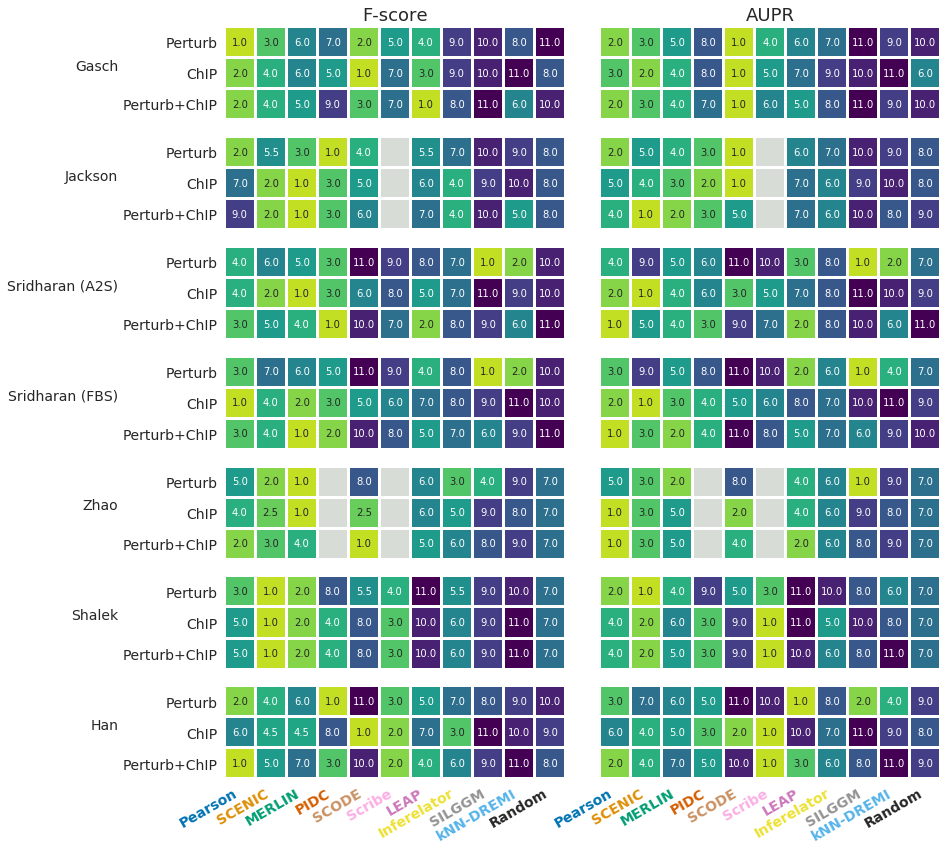

In [56]:
fig, axes = plt.subplots(7, 2, figsize=(13, 12))

for i, (dataset, axrow) in enumerate(zip(DATASETS, axes)):     
    for j, (metric, ax) in enumerate(zip(['fscore', 'AUPR'], axrow)):
        df = scores.loc[(scores.dataset == dataset) &
                        (scores.metric == metric) &
                        (scores.GS_src.isin(PRIMARY_GS))]
        
        hmap = df.pivot_table(columns='algorithm', 
                              index='GS_src', 
                              values='rank')\
                 .reindex(ROW_INDEX,fig3_order_with_rand)
        
        fmt = '.1f'
        ax = sns.heatmap(hmap, ax=ax,
                         annot=True, fmt=fmt, 
                         cbar=False, mask=hmap.isnull(),
                         cmap='viridis_r', square=True,
                         vmin=0, vmax=11,
                         linewidths=2)
        
        if j == 0:
            ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'])
            ax.set_ylabel(format_dataset(dataset), rotation=0, ha='right')
        else:
            ax.set_yticklabels([])
            ax.set_ylabel(None)
            
        if i < 6:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(fig3_order_with_rand, rotation=30, ha='right')
#             [t.set_color(i) for i, t in
#              zip(ALG_PALETTE, ax.xaxis.get_ticklabels())]
            [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig3_order, ax.xaxis.get_ticklabels())]
            [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
            
        if i == 0:
            ax.set_title(METRIC_TITLES[metric], fontsize=18)
            
        ax.set_xlabel(None)
        ax.set_facecolor(sns.xkcd_rgb['light grey'])
        
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig(os.path.join(OUTDIR, 'fig.3a.pdf'), bbox_inches='tight')

In [57]:
fig4_order_with_rand = list(fig4_order)
fig4_order_with_rand.append('Random')

# Fig 4a

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  del sys.path[0]


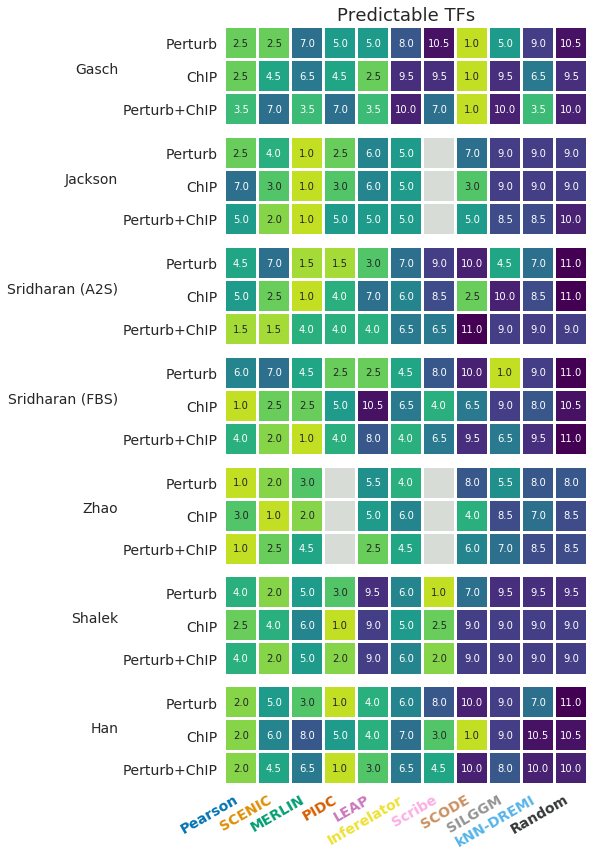

In [60]:
fig, axes = plt.subplots(7, 1, figsize=(8, 12))

for i, (dataset, axrow) in enumerate(zip(DATASETS, axes)): 
    ax = axrow
    for j, (metric) in enumerate(['n_TFs']):
        df = scores.loc[(scores.dataset == dataset) &
                        (scores.metric == metric) &
                        (scores.GS_src.isin(PRIMARY_GS))]
        
        hmap = df.pivot_table(columns='algorithm', 
                              index='GS_src', 
                              values='rank')\
                 .reindex(ROW_INDEX,fig4_order_with_rand)
        
        fmt = '.1f'
        ax = sns.heatmap(hmap, ax=ax,
                         annot=True, fmt=fmt, 
                         cbar=False, mask=hmap.isnull(),
                         cmap='viridis_r', square=True,
                         vmin=0, vmax=11,
                         linewidths=2)
        
        if j == 0:
            ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'])
            ax.set_ylabel(format_dataset(dataset), rotation=0, ha='right')
        else:
            ax.set_yticklabels([])
            ax.set_ylabel(None)
            
        if i < 6:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(fig4_order_with_rand, rotation=30, ha='right')
#             [t.set_color(i) for i, t in
#              zip(ALG_PALETTE, ax.xaxis.get_ticklabels())]
            [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig4_order_with_rand, ax.xaxis.get_ticklabels())]
            [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
            
        if i == 0:
            ax.set_title(METRIC_TITLES[metric], fontsize=18)
            
        ax.set_xlabel(None)
        ax.set_facecolor(sns.xkcd_rgb['light grey'])
        
plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.savefig(os.path.join(OUTDIR, 'fig.4a.pdf'), bbox_inches='tight')

In [61]:
alg_order = hmap.mean(axis=0).sort_values(ascending=True).index
idx_order = [ALGORITHMS.index(a) for a in alg_order]
color_order = [ALG_PALETTE[i] for i in idx_order]

In [62]:
df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]

In [47]:
hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')#\
          #.reindex(ROW_INDEX,alg_order)

# Fig 3C

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # Remove the CWD from sys.path while we load stuff.


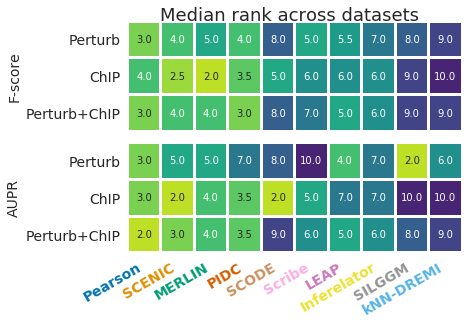

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

for i, (metric, ax) in enumerate(zip(['fscore', 'AUPR'], axes)):
    df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]
    hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')\
          .reindex(ROW_INDEX,fig3_order)
    
    fmt = '.1f'
    ax = sns.heatmap(hmap, ax=ax,
                     annot=True, fmt=fmt, 
                     vmin=1, vmax=11,
                     cbar=False, mask=hmap.isnull(),
                     cmap='viridis_r', square=False,
                     linewidths=2)
    
    if i < 1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(fig3_order, rotation=30, ha='right')
        [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig3_order, ax.xaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
    ax.set_xlabel(None)
    ax.set_ylabel(METRIC_TITLES[metric])
    ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'], rotation=0, ha='right')

fig.suptitle('Median rank across datasets')

plt.subplots_adjust(hspace=0.1, top=0.93)

plt.savefig(os.path.join(OUTDIR, 'fig.3c.pdf'), bbox_inches='tight')

# Fig 4B

/mnt/dv/wid/projects1/WID-Software/centos7/x86_64/anaconda3-2020.11/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  # Remove the CWD from sys.path while we load stuff.


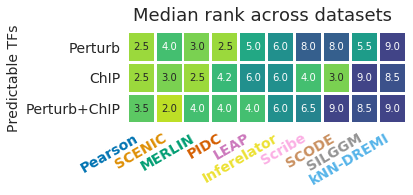

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(5, 1.9))

for i, (metric, ax) in enumerate(zip(['n_TFs'], [axes])):
    df = scores.loc[(scores.metric == metric) &
                    (scores.algorithm != 'Random') &
                    (scores.GS_src.isin(PRIMARY_GS))]
    hmap = df.groupby(['algorithm', 'GS_src'])['rank'].median()\
          .reset_index()\
          .pivot_table(columns='algorithm', index='GS_src', values='rank')\
          .reindex(ROW_INDEX,fig4_order)
    
    fmt = '.1f'
    ax = sns.heatmap(hmap, ax=ax,
                     annot=True, fmt=fmt, 
                     vmin=1, vmax=11,
                     cbar=False, mask=hmap.isnull(),
                     cmap='viridis_r', square=False,
                     linewidths=2)
    
    if i < 0:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(fig4_order, rotation=30, ha='right')
        [t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig4_order, ax.xaxis.get_ticklabels())]
        [t.set_fontweight('bold') for t in ax.xaxis.get_ticklabels()]
    ax.set_xlabel(None)
    ax.set_ylabel(METRIC_TITLES[metric])
    ax.set_yticklabels(['Perturb', 'ChIP', 'Perturb+ChIP'], rotation=0, ha='right')

fig.suptitle('Median rank across datasets')

plt.subplots_adjust(hspace=0.1, top=0.8)

plt.savefig(os.path.join(OUTDIR, 'fig.4b.pdf'), bbox_inches='tight')

In [66]:
#summary = summary.drop("Random", axis = 1)
summary = summary.drop("precision", axis = 0)

In [67]:
summary

algorithm,Pearson,SCENIC,MERLIN,PIDC,LEAP,SCODE,Scribe,SILGGM,Inferelator,kNN-DREMI
metric,,,,,,,,,,
fscore,3.0,4.0,3.0,3.0,5.5,6.0,6.0,9.0,7.0,9.0
AUPR,2.0,3.0,4.0,4.5,6.0,5.0,5.0,9.0,7.0,9.0
n_TFs,2.5,2.5,3.5,3.5,5.0,7.0,6.5,9.0,6.0,9.0


In [69]:
summary_for3e = summary.drop('n_TFs', axis=0)

# 3E

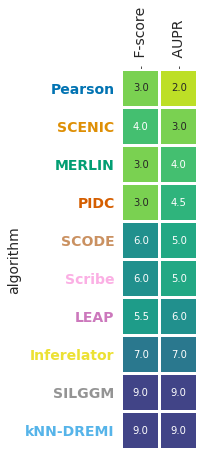

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(3, 7))



'''  
# Set algorithm labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

# ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xticklabels([' Runtime', ' Memory'], rotation=90, ha='center', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(sns.xkcd_rgb['light grey'])
'''

ax = sns.heatmap(summary_for3e[fig3_order].T, ax=ax,
                 annot=True, fmt='.1f', 
                 vmin=1, vmax=11,
                 cbar=False, mask=summary_for3e[fig3_order].T.isnull(),
                 cmap='viridis_r', square=True,
                 linewidths=2)
ax.set_yticklabels(fig3_order, rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig3_order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]


ax.set_xlabel(None)


ax.xaxis.tick_top()
# , ' Predictable\nTFs'
ax.set_xticklabels([' F-score', ' AUPR'], rotation=90, ha='center', va='bottom')

# fig.suptitle('Median rank across datasets')

plt.subplots_adjust(wspace=-0.5)

plt.savefig(os.path.join(OUTDIR, 'fig.3e.pdf'), bbox_inches='tight')

# 4D

In [71]:
summary_for4d = summary.drop(['fscore', 'AUPR'], axis=0)

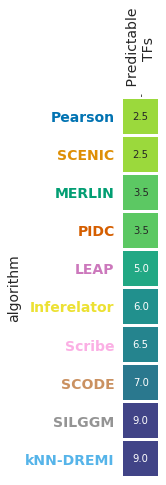

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(3, 7))



'''  
# Set algorithm labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]

# ax.set_xticklabels([])
ax.xaxis.tick_top()
ax.set_xticklabels([' Runtime', ' Memory'], rotation=90, ha='center', va='bottom')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(sns.xkcd_rgb['light grey'])
'''

ax = sns.heatmap(summary_for4d[fig4_order].T, ax=ax,
                 annot=True, fmt='.1f', 
                 vmin=1, vmax=11,
                 cbar=False, mask=summary_for4d[fig4_order].T.isnull(),
                 cmap='viridis_r', square=True,
                 linewidths=2)
ax.set_yticklabels(fig4_order, rotation=0, ha='right')
[t.set_color(PALETTE_MAP[alg]) for alg, t in zip(fig4_order, ax.yaxis.get_ticklabels())]
[t.set_fontweight('bold') for t in ax.yaxis.get_ticklabels()]


ax.set_xlabel(None)


ax.xaxis.tick_top()
# , ' Predictable\nTFs'
ax.set_xticklabels([' Predictable\nTFs'], rotation=90, ha='center', va='bottom')

# fig.suptitle('Median rank across datasets')

plt.subplots_adjust(wspace=-0.5)

plt.savefig(os.path.join(OUTDIR, 'fig.4d.pdf'), bbox_inches='tight')